# 📌 About this tutorial

This tutorial provides an **example of making predictions on new data** using Scikit-learn and LazyPredict models.


# Mount Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Show all the columns of the dataframe
pd.set_option('display.max_columns', None)

# Show all the rows of the dataframe
pd.set_option('display.max_rows', None)

# Packages

In [3]:
!pip install rdkit==2024.09.4       # RDKit in EDA was rdkit-2024.9.4 so we shall install the same version
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 21.0 MB/s eta 0:00:00


In [4]:
import rdkit
print(rdkit.__version__)
# rdkit in EDA was rdkit-2024.9.4

2024.09.4


# Data

In [8]:
# Path to the folder containing the data to predict on
folder_path = '/content/drive/Shared drives_your_path_to_new_data/'
file_name01 = 'file1.csv'
file_name02 = 'file2.csv'

In [9]:
# Read the CSV file into a DataFrame
data01 = pd.read_csv(f'{folder_path}{file_name01}')
data02 = pd.read_csv(f'{folder_path}{file_name02}')

In [10]:
# Preview
data01.head(2)

,No.,SMILES,uh/cm2·V-1·s-1,ue/cm2·V-1·s-1,type,mobility_level_n,mobility_level_p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,O=C(C1CC(CCCCCCCC)CCCCCCCC)C2=C(SC(C)=C2)C3=C(...,0.0,0.0100,n-type,low,low,-2.16394,-0.02362,1.44541,-0.19457,0.68733,0.51749,-0.58633,-0.47103,-0.54201,-1.31026,-0.54485,-0.39472,-0.10490,-0.38700,2.65783,-0.13465,-0.79157,0.57493,0.74380,0.73422,0.54697,1.32313,0.90767,1.35014
1,2,CC1=CC(C(CCCCCCCC)(CCCCCCCC)C2=C3C=CC(C4=CC=C(...,0.0,0.0048,n-type,low,low,-0.01716,-0.87756,0.26409,0.84990,-0.16196,-0.45031,-0.60355,0.08855,0.35615,-0.91559,0.96175,0.95652,1.38545,-0.78417,-0.43077,1.08705,-0.15330,-0.25945,0.65712,0.14710,1.03162,-0.40013,-1.34323,0.60123


In [11]:
data02.head(2)

,No.,SMILES,uh/cm2·V-1·s-1,ue/cm2·V-1·s-1,type,mobility_level_n,mobility_level_p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,O=C(C1CC(CCCCCCCC)CCCCCCCC)C2=C(SC(C)=C2)C3=C(...,0.0,0.0100,n-type,low,low,1.02053,-0.51838,2.48220,0.21224,-1.74355,0.40740,-0.49790,0.39320,-0.86812,-0.57401,0.17047,-0.31635,0.21562,1.01346,-0.45165,0.22952,-0.99923,-1.62284,-0.16814,0.94734,0.30830,0.42568,-0.04744,1.38139
1,2,CC1=CC(C(CCCCCCCC)(CCCCCCCC)C2=C3C=CC(C4=CC=C(...,0.0,0.0048,n-type,low,low,-0.01137,-0.24407,0.82445,-0.35404,1.06057,0.68927,-1.67392,-0.16926,-0.53368,-0.63976,0.10654,0.01681,-0.35126,0.34150,-0.08301,-0.33423,0.06612,-0.04692,-1.45458,-0.12670,0.16375,0.48708,0.22545,-0.03368


In [12]:
# Drop the 'No.' column
data01.drop(columns=['No.'], inplace=True)
data02.drop(columns=['No.'], inplace=True)

In [13]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SMILES            670 non-null    object 
 1   uh/cm2·V-1·s-1    670 non-null    float64
 2   ue/cm2·V-1·s-1    670 non-null    float64
 3   type              670 non-null    object 
 4   mobility_level_n  670 non-null    object 
 5   mobility_level_p  670 non-null    object 
 6   0                 670 non-null    float64
 7   1                 670 non-null    float64
 8   2                 670 non-null    float64
 9   3                 670 non-null    float64
 10  4                 670 non-null    float64
 11  5                 670 non-null    float64
 12  6                 670 non-null    float64
 13  7                 670 non-null    float64
 14  8                 670 non-null    float64
 15  9                 670 non-null    float64
 16  10                670 non-null    float64
 1

In [14]:
data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SMILES            670 non-null    object 
 1   uh/cm2·V-1·s-1    670 non-null    float64
 2   ue/cm2·V-1·s-1    670 non-null    float64
 3   type              670 non-null    object 
 4   mobility_level_n  670 non-null    object 
 5   mobility_level_p  670 non-null    object 
 6   0                 670 non-null    float64
 7   1                 670 non-null    float64
 8   2                 670 non-null    float64
 9   3                 670 non-null    float64
 10  4                 670 non-null    float64
 11  5                 670 non-null    float64
 12  6                 670 non-null    float64
 13  7                 670 non-null    float64
 14  8                 670 non-null    float64
 15  9                 670 non-null    float64
 16  10                670 non-null    float64
 1

In [15]:
# Check if there are nan(s) in data01 and data02
data01.isna().sum()

,0
SMILES,0
uh/cm2·V-1·s-1,0
ue/cm2·V-1·s-1,0
type,0
mobility_level_n,0
mobility_level_p,0
0,0
1,0
2,0
3,0


In [16]:
# Check if there are nan(s) in data01 and data02
data02.isna().sum() # all good, no nans

,0
SMILES,0
uh/cm2·V-1·s-1,0
ue/cm2·V-1·s-1,0
type,0
mobility_level_n,0
mobility_level_p,0
0,0
1,0
2,0
3,0


In [17]:
data01.columns

Index(['SMILES', 'uh/cm2·V-1·s-1', 'ue/cm2·V-1·s-1', 'type',
       'mobility_level_n', 'mobility_level_p', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23'],
      dtype='object')

In [18]:
data02.columns

Index(['SMILES', 'uh/cm2·V-1·s-1', 'ue/cm2·V-1·s-1', 'type',
       'mobility_level_n', 'mobility_level_p', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23'],
      dtype='object')

# Load the model(s)

In [19]:
# Load the linear regression model saved in the folder
model_path = '/content/drive/Shared drives/your_path_to_the_linear_regression_model_elisa.pkl'

In [20]:
# Load the model from the pickle file

import pickle

with open(f'{model_path}', 'rb') as file:
    linear_regression_model = pickle.load(file)

# Predict on the new data smiles

👀 When we predict on new data, we should make sure to use the same features as in the train data (the data that we use to train our model):
1. RDKit features


In [21]:
# Load the features used to train the model
train_features_path = '/content/drive/Shared drives/your_path_to_features_ls.pkl'

# Open the pkl file
with open(f'{train_features_path}', 'rb') as file:
    train_features = pickle.load(file)

print(len(train_features))
print(train_features)

110
['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'SPS', 'MolWt', 'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'NHOHCount', 'NumAliphaticCarbocycles', 'NumAliphati

In [22]:
# Check the columns in data01 and data02
print(data01.info()) # <-- they do not have the rdkit features
print(data02.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SMILES            670 non-null    object 
 1   uh/cm2·V-1·s-1    670 non-null    float64
 2   ue/cm2·V-1·s-1    670 non-null    float64
 3   type              670 non-null    object 
 4   mobility_level_n  670 non-null    object 
 5   mobility_level_p  670 non-null    object 
 6   0                 670 non-null    float64
 7   1                 670 non-null    float64
 8   2                 670 non-null    float64
 9   3                 670 non-null    float64
 10  4                 670 non-null    float64
 11  5                 670 non-null    float64
 12  6                 670 non-null    float64
 13  7                 670 non-null    float64
 14  8                 670 non-null    float64
 15  9                 670 non-null    float64
 16  10                670 non-null    float64
 1

In [23]:
# Take the function previously used in the notebook EDA_practice_elisa.ipynb to make canonical smiles
from rdkit import Chem
from rdkit.Chem import AllChem


def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [24]:
# Canonical SMILES
Canon_SMILES_01 = canonical_smiles(data01.SMILES)
print(len(Canon_SMILES_01))

Canon_SMILES_02 = canonical_smiles(data02.SMILES)
len(Canon_SMILES_02)

670


670

In [25]:
# Put the canonical smiles in the dataframe
data01['canon_SMILES'] = Canon_SMILES_01

data02['canon_SMILES'] = Canon_SMILES_02

In [26]:
# Check if all rows have canon_smiles in data
print(data01.canon_SMILES.isna().sum())
print(data02.canon_SMILES.isna().sum())

0
0


In [27]:
# Check for duplicates
# Check if there are duplicate canon smiles, adn create a list for those duplicate smiles
duplicates_smiles_01 = data01[data01['canon_SMILES'].duplicated()]['canon_SMILES'].values
print(len(duplicates_smiles_01)) # <-- this is an important detail to report later

duplicates_smiles_02 = data02[data02['canon_SMILES'].duplicated()]['canon_SMILES'].values
print(len(duplicates_smiles_02))

2
2


In [28]:
# Extract the info of those duplicates
# Are ths values in the columns similar? or are they very different between duplicates?
data01[data01['canon_SMILES'].isin(duplicates_smiles_01)]

,SMILES,uh/cm2·V-1·s-1,ue/cm2·V-1·s-1,type,mobility_level_n,mobility_level_p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,canon_SMILES
35,CC1=CC2=C(N=C(C3=CC=C(C4=NC(C=C(C)C(C)=C5)=C5N...,0.0,0.0,p-type,low,low,-1.15502,0.28185,1.42495,2.37279,0.23605,-1.50818,1.34217,-0.06406,-0.63108,-1.07770,0.07758,-1.10309,0.91538,-0.94560,0.91114,1.75196,-0.22380,0.60676,1.06317,-0.14396,0.85308,0.81099,-0.57419,0.77020,Cc1cc2nc3c4ccc5c6c(ccc(c(=O)n3c2cc1C)c46)c(=O)...
203,CC1=C(C)C=C2N3C(=NC2=C1)C1=C2C(=CC=C4C(=O)N5C6...,0.0,0.1,n-type,low,low,-1.14336,0.27185,1.41990,2.35963,0.25954,-1.50193,1.33588,-0.06499,-0.61936,-1.08152,0.09749,-1.09965,0.92797,-0.94067,0.89061,1.77341,-0.20526,0.61864,1.05898,-0.14315,0.85234,0.81166,-0.57010,0.76629,Cc1cc2nc3c4ccc5c6c(ccc(c(=O)n3c2cc1C)c46)c(=O)...
224,O=C1N(CCCC(CCCCCCCCCC)CCCCCCCCCC)C(C2=CC=C(C3=...,2.5,0.0,p-type,low,medium,-1.92867,0.16257,-0.20392,0.52829,0.94775,-0.31831,-1.14207,-0.05244,0.42171,-0.40512,-0.44343,-0.06251,-0.06806,-0.21852,0.92884,-1.24561,-1.25770,-0.28055,0.96320,1.86744,1.48423,-1.11520,0.66714,0.46080,CCCCCCCCCCC(CCCCCCCCCC)CCCCN1C(=O)C2=C(c3ccc(-...
225,O=C1N(CCCC(CCCCCCCCCC)CCCCCCCCCC)C(C2=CC=C(C3=...,2.5,0.0,p-type,low,medium,-1.92867,0.16257,-0.20392,0.52829,0.94775,-0.31831,-1.14207,-0.05244,0.42171,-0.40512,-0.44343,-0.06251,-0.06806,-0.21852,0.92884,-1.24561,-1.25770,-0.28055,0.96320,1.86744,1.48423,-1.11520,0.66714,0.46080,CCCCCCCCCCC(CCCCCCCCCC)CCCCN1C(=O)C2=C(c3ccc(-...


In [29]:
# Extract the info of those duplicates
data02[data02['canon_SMILES'].isin(duplicates_smiles_02)]

,SMILES,uh/cm2·V-1·s-1,ue/cm2·V-1·s-1,type,mobility_level_n,mobility_level_p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,canon_SMILES
35,CC1=CC2=C(N=C(C3=CC=C(C4=NC(C=C(C)C(C)=C5)=C5N...,0.0,0.0,p-type,low,low,-0.70921,0.22831,1.07627,-0.16702,-0.85421,0.98500,0.32430,0.86493,0.04020,-0.00471,-0.58445,-0.15159,0.38724,0.53387,0.29322,-0.31827,-2.92001,-0.61243,-0.95243,-0.04079,-0.29295,-0.49263,-0.17603,0.18817,Cc1cc2nc3c4ccc5c6c(ccc(c(=O)n3c2cc1C)c46)c(=O)...
203,CC1=C(C)C=C2N3C(=NC2=C1)C1=C2C(=CC=C4C(=O)N5C6...,0.0,0.1,n-type,low,low,-0.66120,0.21889,1.13893,-0.13153,-1.09088,1.01866,0.34250,0.90252,0.08117,-0.02662,-0.57744,-0.12491,0.36571,0.51969,0.31938,-0.32812,-2.77421,-0.55025,-0.92152,0.01125,-0.21966,-0.54218,-0.16659,0.23709,Cc1cc2nc3c4ccc5c6c(ccc(c(=O)n3c2cc1C)c46)c(=O)...
224,O=C1N(CCCC(CCCCCCCCCC)CCCCCCCCCC)C(C2=CC=C(C3=...,2.5,0.0,p-type,low,medium,0.10376,-0.16886,1.45415,0.16407,0.37685,0.32798,-0.46709,-0.42301,0.16409,0.40838,-1.08016,-0.39674,-2.08133,0.38731,0.02017,-0.37532,-0.11704,1.10926,-1.50189,-0.50077,0.16941,0.92324,-0.18991,1.15627,CCCCCCCCCCC(CCCCCCCCCC)CCCCN1C(=O)C2=C(c3ccc(-...
225,O=C1N(CCCC(CCCCCCCCCC)CCCCCCCCCC)C(C2=CC=C(C3=...,2.5,0.0,p-type,low,medium,0.10376,-0.16886,1.45415,0.16407,0.37685,0.32798,-0.46709,-0.42301,0.16409,0.40838,-1.08016,-0.39674,-2.08133,0.38731,0.02017,-0.37532,-0.11704,1.10926,-1.50189,-0.50077,0.16941,0.92324,-0.18991,1.15627,CCCCCCCCCCC(CCCCCCCCCC)CCCCN1C(=O)C2=C(c3ccc(-...


In [30]:
# Drop duplicates
dataset_new_01 = data01.drop_duplicates(subset=['canon_SMILES'])
print(len(dataset_new_01))

dataset_new_02 = data02.drop_duplicates(subset=['canon_SMILES'])
print(len(dataset_new_02))

668
668


## Get the rdkit descriptors on the new data smiles

In [31]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def RDkit_descriptors(smiles): # The canonical smiles
    # Initialize the descriptor calculator
    calc = MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors = []
    for smi in smiles:
        try:
            # Create RDKit molecule object and validate it
            mol = Chem.MolFromSmiles(smi)
            if mol is None:
                raise ValueError(f"Invalid SMILES: {smi}")

            # Add hydrogens to the molecule
            mol = Chem.AddHs(mol)

            # Calculate all descriptors
            descriptors = calc.CalcDescriptors(mol)
            Mol_descriptors.append(descriptors)
        except Exception as e:
            print(f"Error processing SMILES '{smi}': {e}")
            Mol_descriptors.append([None] * len(desc_names))  # Append placeholders for invalid SMILES

    return Mol_descriptors, desc_names

### data01

In [32]:
# Function call
Mol_descriptors, desc_names = RDkit_descriptors(dataset_new_01['canon_SMILES'])

In [33]:
# Save the descriptors in a new dataframe
data01_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
print(len(data01_with_200_descriptors))
data01_with_200_descriptors.head()

668


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15.239842,15.239842,0.210570,-6.390093,0.164806,42.171429,514.841,468.473,514.293923,194,0,0.174711,-0.293305,0.293305,0.174711,0.828571,1.285714,1.742857,32.136389,9.806455,2.380154,-2.215916,2.449684,-2.256507,7.224334,0.078159,3.772102,2.901477,2627.543322,65.687716,63.132993,18.765986,34.597095,31.974745,10.607738,5.803869,7.845110,3.703912,5.670238,2.460225,4.305761,-1.26,1.316790e+15,5.412939,14.471971,7.859544,286.108749,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,0.0,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,12.084837,0.0,9.754294,0.0,34.14,189.076176,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,388.314068,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0.677419,35,0,2,1,0,1,0,0,2,2,0,0,4,0,4,2,20,0,0,0,0,0,2.238169,3,10.59614,153.350,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,10.107387,10.107387,0.080151,-5.830776,0.137044,37.500000,552.872,504.488,552.353821,212,0,0.112382,-0.172636,0.172636,0.112382,0.675000,1.300000,2.000000,32.140683,9.697318,2.420734,-2.332018,2.550226,-2.254490,6.996630,0.397530,2.714297,2.317849,

In [34]:
# Drop the columns that ARE NOT in the train_features list
data01_with_200_descriptors.drop(columns=[col for col in data01_with_200_descriptors.columns if col not in train_features], inplace=True)
print(len(data01_with_200_descriptors.columns))
data01_with_200_descriptors.head()

110


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene
0,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2
1,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.000000,0.00000,0.0,0.0,0.000000,0.00000,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.00000,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
2,16.464528,0.309597,-4.945860,29.384615,787.088,0.576923,32.138762,7.235045,0.100918,0.908495,1.717652,-2.92,1.816619e+26,11.557435,18.905529,0.0,11.126903,23.268883,11.56649,0.0,0.0,9.589074,17.56166,0.00000,45.347144,77.433033,86.576899,84.093225,17.978846,90.205628,56.913633,0.0,0.00000,0.000000,116.628517,0.0,101.285790,19.508589,0.0,17.56166,0.0,45.347144,11.56649,12.74585,36.972668,204.585246,0.0,19.508589,34.14,9.589074,17.561660,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,63.054894,-1.492742,17.604994,0.0,-8.350429,-16.349108,-9.466231,-66.565276,-15.585160,0.0,0,0,0,0,0,1,4,5,0,0,6,10,4,24,0,0,0,4.201912,14.70784,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4,2,0,0,0,0,0,0,4
3,9.859580,0.524925,-5.149049,39.478261,695.226,0.456522,32.139665,7.284202,0.666309,1.295668,2.687528,-1.20,2.063778e+31,7.128884,20.344282,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.00000,45.347144,103.882667,111.110664,118.521174,5.483034,84.987030,45.347144,0.0,0.00000,0.000000,168.569851,0.0,56.177775,29.262883,0.0,0.00000,0.0,45.347144,0.00000,25.49170,13.703784,246.369498,0.0,29.262883,0.00,17.819861,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,67.167169,-2.477273,-13.278921,0.0,-8.352292,0.000000,-8.004968,-97.913215,-25.373950,0.0,0,0,0,0,0,0,4,4,0,0,4,4,4,29,0,0,0,3.152870,16.04164,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4
4,10.119

In [35]:
# Check if have nan in data01_with_200_descriptors
print(data01_with_200_descriptors.isna().any().any())  # Returns True if there's at least one NaN

True


In [36]:
# Check NaNs for column
data01_with_200_descriptors.isna().sum()  # NaN count for each column

,0
MaxAbsEStateIndex,0
MinAbsEStateIndex,0
MinEStateIndex,0
SPS,0
MolWt,0
FpDensityMorgan1,0
BCUT2D_MWHI,65
BCUT2D_MRHI,65
BCUT2D_MRLOW,65
AvgIpc,0


In [37]:
# Drop the rows with nan(s) in data01_with_200_descriptors without resetting the index because we will merge with the rest of the columns in the next cell
data01_with_200_descriptors.dropna(inplace=True)
print(len(data01_with_200_descriptors))
data01_with_200_descriptors.head()

603


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene
0,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2
1,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.000000,0.00000,0.0,0.0,0.000000,0.00000,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.00000,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
2,16.464528,0.309597,-4.945860,29.384615,787.088,0.576923,32.138762,7.235045,0.100918,0.908495,1.717652,-2.92,1.816619e+26,11.557435,18.905529,0.0,11.126903,23.268883,11.56649,0.0,0.0,9.589074,17.56166,0.00000,45.347144,77.433033,86.576899,84.093225,17.978846,90.205628,56.913633,0.0,0.00000,0.000000,116.628517,0.0,101.285790,19.508589,0.0,17.56166,0.0,45.347144,11.56649,12.74585,36.972668,204.585246,0.0,19.508589,34.14,9.589074,17.561660,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,63.054894,-1.492742,17.604994,0.0,-8.350429,-16.349108,-9.466231,-66.565276,-15.585160,0.0,0,0,0,0,0,1,4,5,0,0,6,10,4,24,0,0,0,4.201912,14.70784,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4,2,0,0,0,0,0,0,4
3,9.859580,0.524925,-5.149049,39.478261,695.226,0.456522,32.139665,7.284202,0.666309,1.295668,2.687528,-1.20,2.063778e+31,7.128884,20.344282,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.00000,45.347144,103.882667,111.110664,118.521174,5.483034,84.987030,45.347144,0.0,0.00000,0.000000,168.569851,0.0,56.177775,29.262883,0.0,0.00000,0.0,45.347144,0.00000,25.49170,13.703784,246.369498,0.0,29.262883,0.00,17.819861,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,67.167169,-2.477273,-13.278921,0.0,-8.352292,0.000000,-8.004968,-97.913215,-25.373950,0.0,0,0,0,0,0,0,4,4,0,0,4,4,4,29,0,0,0,3.152870,16.04164,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4
4,10.119

In [38]:
# Compare two lists, data01_with_200_descriptors.columns and train_features
common_elements = set(data01_with_200_descriptors.columns) & set(train_features)
print(len(common_elements))
print("Common elements:", common_elements)

only_in_rdkit = set(train_features) - set(data01_with_200_descriptors.columns)
print("Elements only in train_features:", only_in_rdkit)

only_in_data01 = set(data01_with_200_descriptors.columns) - set(train_features)
print("Elements only in data01_with_200_descriptors.columns:", only_in_data01)


110
Common elements: {'SlogP_VSA7', 'SMR_VSA2', 'NumRotatableBonds', 'EState_VSA6', 'fr_ether', 'fr_Ar_OH', 'EState_VSA2', 'NHOHCount', 'NumAmideBonds', 'PEOE_VSA9', 'EState_VSA3', 'SlogP_VSA8', 'PEOE_VSA3', 'BalabanJ', 'SlogP_VSA5', 'NumAtomStereoCenters', 'fr_Al_OH', 'SMR_VSA10', 'fr_Ar_N', 'fr_NH1', 'VSA_EState6', 'NumAromaticRings', 'fr_allylic_oxid', 'PEOE_VSA12', 'fr_sulfide', 'NumAliphaticCarbocycles', 'PEOE_VSA8', 'NumAliphaticHeterocycles', 'MolWt', 'VSA_EState5', 'PEOE_VSA1', 'EState_VSA7', 'fr_bicyclic', 'PEOE_VSA7', 'MinEStateIndex', 'SPS', 'PEOE_VSA4', 'NumHeteroatoms', 'EState_VSA5', 'fr_methoxy', 'NumAromaticCarbocycles', 'EState_VSA8', 'fr_nitro', 'Ipc', 'PEOE_VSA10', 'NumSaturatedCarbocycles', 'MinAbsEStateIndex', 'NumBridgeheadAtoms', 'HallKierAlpha', 'fr_ester', 'BCUT2D_MRLOW', 'SMR_VSA4', 'PEOE_VSA6', 'PEOE_VSA14', 'SlogP_VSA12', 'VSA_EState8', 'VSA_EState7', 'NumSaturatedHeterocycles', 'AvgIpc', 'SlogP_VSA10', 'fr_NH0', 'PEOE_VSA2', 'NumAromaticHeterocycles', 'Kapp

### data02

In [39]:
# Now get the desriptors for data02

# Function call
Mol_descriptors, desc_names = RDkit_descriptors(dataset_new_02['canon_SMILES'])

# Save the descriptors in a new dataframe
data02_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
print(len(data02_with_200_descriptors))
data02_with_200_descriptors.head()

668


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,15.239842,15.239842,0.210570,-6.390093,0.164806,42.171429,514.841,468.473,514.293923,194,0,0.174711,-0.293305,0.293305,0.174711,0.828571,1.285714,1.742857,32.136389,9.806455,2.380154,-2.215916,2.449684,-2.256507,7.224334,0.078159,3.772102,2.901477,2627.543322,65.687716,63.132993,18.765986,34.597095,31.974745,10.607738,5.803869,7.845110,3.703912,5.670238,2.460225,4.305761,-1.26,1.316790e+15,5.412939,14.471971,7.859544,286.108749,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,0.0,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,12.084837,0.0,9.754294,0.0,34.14,189.076176,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,388.314068,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0.677419,35,0,2,1,0,1,0,0,2,2,0,0,4,0,4,2,20,0,0,0,0,0,2.238169,3,10.59614,153.350,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,10.107387,10.107387,0.080151,-5.830776,0.137044,37.500000,552.872,504.488,552.353821,212,0,0.112382,-0.172636,0.172636,0.112382,0.675000,1.300000,2.000000,32.140683,9.697318,2.420734,-2.332018,2.550226,-2.254490,6.996630,0.397530,2.714297,2.317849,

In [40]:
# Drop the columns that ARE NOT in the train_features list
data02_with_200_descriptors.drop(columns=[col for col in data02_with_200_descriptors.columns if col not in train_features], inplace=True)
print(len(data02_with_200_descriptors.columns))
data02_with_200_descriptors.head()

110


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene
0,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2
1,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.000000,0.00000,0.0,0.0,0.000000,0.00000,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.00000,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
2,16.464528,0.309597,-4.945860,29.384615,787.088,0.576923,32.138762,7.235045,0.100918,0.908495,1.717652,-2.92,1.816619e+26,11.557435,18.905529,0.0,11.126903,23.268883,11.56649,0.0,0.0,9.589074,17.56166,0.00000,45.347144,77.433033,86.576899,84.093225,17.978846,90.205628,56.913633,0.0,0.00000,0.000000,116.628517,0.0,101.285790,19.508589,0.0,17.56166,0.0,45.347144,11.56649,12.74585,36.972668,204.585246,0.0,19.508589,34.14,9.589074,17.561660,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,63.054894,-1.492742,17.604994,0.0,-8.350429,-16.349108,-9.466231,-66.565276,-15.585160,0.0,0,0,0,0,0,1,4,5,0,0,6,10,4,24,0,0,0,4.201912,14.70784,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4,2,0,0,0,0,0,0,4
3,9.859580,0.524925,-5.149049,39.478261,695.226,0.456522,32.139665,7.284202,0.666309,1.295668,2.687528,-1.20,2.063778e+31,7.128884,20.344282,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.00000,45.347144,103.882667,111.110664,118.521174,5.483034,84.987030,45.347144,0.0,0.00000,0.000000,168.569851,0.0,56.177775,29.262883,0.0,0.00000,0.0,45.347144,0.00000,25.49170,13.703784,246.369498,0.0,29.262883,0.00,17.819861,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,67.167169,-2.477273,-13.278921,0.0,-8.352292,0.000000,-8.004968,-97.913215,-25.373950,0.0,0,0,0,0,0,0,4,4,0,0,4,4,4,29,0,0,0,3.152870,16.04164,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4
4,10.119

In [41]:
# Check if have nan in data02_with_200_descriptors
print(data02_with_200_descriptors.isna().any().any())  # Returns True if there's at least one NaN

True


In [42]:
# Check NaNs for column
data02_with_200_descriptors.isna().sum()  # NaN count for each column

,0
MaxAbsEStateIndex,0
MinAbsEStateIndex,0
MinEStateIndex,0
SPS,0
MolWt,0
FpDensityMorgan1,0
BCUT2D_MWHI,65
BCUT2D_MRHI,65
BCUT2D_MRLOW,65
AvgIpc,0


In [43]:
# Drop the rows with nan(s) in data02_with_200_descriptors without resetting the index because we will merge with the rest of the columns in the next cell
data02_with_200_descriptors.dropna(inplace=True)
print(len(data02_with_200_descriptors))
data02_with_200_descriptors.head()

603


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene
0,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.566490,0.00000,0.0,0.0,9.589074,0.00000,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.00000,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2
1,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.000000,0.00000,0.0,0.0,0.000000,0.00000,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.00000,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0
2,16.464528,0.309597,-4.945860,29.384615,787.088,0.576923,32.138762,7.235045,0.100918,0.908495,1.717652,-2.92,1.816619e+26,11.557435,18.905529,0.0,11.126903,23.268883,11.56649,0.0,0.0,9.589074,17.56166,0.00000,45.347144,77.433033,86.576899,84.093225,17.978846,90.205628,56.913633,0.0,0.00000,0.000000,116.628517,0.0,101.285790,19.508589,0.0,17.56166,0.0,45.347144,11.56649,12.74585,36.972668,204.585246,0.0,19.508589,34.14,9.589074,17.561660,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,63.054894,-1.492742,17.604994,0.0,-8.350429,-16.349108,-9.466231,-66.565276,-15.585160,0.0,0,0,0,0,0,1,4,5,0,0,6,10,4,24,0,0,0,4.201912,14.70784,0,0,0,2,0,0,0,0,0,0,2,0,0,0,4,2,0,0,0,0,0,0,4
3,9.859580,0.524925,-5.149049,39.478261,695.226,0.456522,32.139665,7.284202,0.666309,1.295668,2.687528,-1.20,2.063778e+31,7.128884,20.344282,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.00000,0.00000,45.347144,103.882667,111.110664,118.521174,5.483034,84.987030,45.347144,0.0,0.00000,0.000000,168.569851,0.0,56.177775,29.262883,0.0,0.00000,0.0,45.347144,0.00000,25.49170,13.703784,246.369498,0.0,29.262883,0.00,17.819861,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,67.167169,-2.477273,-13.278921,0.0,-8.352292,0.000000,-8.004968,-97.913215,-25.373950,0.0,0,0,0,0,0,0,4,4,0,0,4,4,4,29,0,0,0,3.152870,16.04164,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4
4,10.119

In [44]:
# Compare two lists, data02_with_200_descriptors.columns and train_features
common_elements = set(data02_with_200_descriptors.columns) & set(train_features)
print(len(common_elements))
print("Common elements:", common_elements)

only_in_rdkit = set(train_features) - set(data02_with_200_descriptors.columns)
print("Elements only in train_features:", only_in_rdkit)

only_in_data01 = set(data02_with_200_descriptors.columns) - set(train_features)
print("Elements only in data02_with_200_descriptors.columns:", only_in_data01)

110
Common elements: {'SlogP_VSA7', 'SMR_VSA2', 'NumRotatableBonds', 'EState_VSA6', 'fr_ether', 'fr_Ar_OH', 'EState_VSA2', 'NHOHCount', 'NumAmideBonds', 'PEOE_VSA9', 'EState_VSA3', 'SlogP_VSA8', 'PEOE_VSA3', 'BalabanJ', 'SlogP_VSA5', 'NumAtomStereoCenters', 'fr_Al_OH', 'SMR_VSA10', 'fr_Ar_N', 'fr_NH1', 'VSA_EState6', 'NumAromaticRings', 'fr_allylic_oxid', 'PEOE_VSA12', 'fr_sulfide', 'NumAliphaticCarbocycles', 'PEOE_VSA8', 'NumAliphaticHeterocycles', 'MolWt', 'VSA_EState5', 'PEOE_VSA1', 'EState_VSA7', 'fr_bicyclic', 'PEOE_VSA7', 'MinEStateIndex', 'SPS', 'PEOE_VSA4', 'NumHeteroatoms', 'EState_VSA5', 'fr_methoxy', 'NumAromaticCarbocycles', 'EState_VSA8', 'fr_nitro', 'Ipc', 'PEOE_VSA10', 'NumSaturatedCarbocycles', 'MinAbsEStateIndex', 'NumBridgeheadAtoms', 'HallKierAlpha', 'fr_ester', 'BCUT2D_MRLOW', 'SMR_VSA4', 'PEOE_VSA6', 'PEOE_VSA14', 'SlogP_VSA12', 'VSA_EState8', 'VSA_EState7', 'NumSaturatedHeterocycles', 'AvgIpc', 'SlogP_VSA10', 'fr_NH0', 'PEOE_VSA2', 'NumAromaticHeterocycles', 'Kapp

# Prediction

## Define X (data01)

In [45]:
# Assign Features and Labels
X = data01_with_200_descriptors # molecular features

In [46]:
len(data01_with_200_descriptors)

603

In [47]:
# Use the loaded model on the new data

y_pred = linear_regression_model.predict(X)
print("Predictions using the loaded model:", y_pred)

Predictions using the loaded model: [-2.00925973e+007 -3.32666429e+009 -2.77193673e+018 -3.14907134e+023
 -2.52166568e+015 -1.30333276e+030 -3.48706695e+080 -3.47750136e+077
 -2.26263075e+019 -1.39063297e+002 -1.88007976e+099 -6.29100167e+086
 -5.98574741e+080 -1.76428229e+084 -2.60431278e+063 -3.99743005e+041
 -1.78254859e+040 -7.58965037e+050 -2.88618756e+071 -2.16431105e+062
 -6.30962711e+058 -1.58392343e+068 -2.15381366e+036 -1.83585326e+060
 -4.63271874e+095 -2.10992415e+070 -6.01161357e+005 -9.83627698e+005
 -1.14411424e+039 -3.78890928e+010 -2.77670331e+115 -2.35379589e+042
 -6.74746196e+074 -1.48985628e+002 -6.16782657e+041 -1.14992240e+004
 -9.35760170e+115 -2.48155555e+065 -5.82353343e+055 -2.48623426e+110
 -6.16515649e+121 -2.75428002e+124 -7.34677698e+053 -7.43047943e+010
 -8.76823183e+069 -2.31555047e+071 -2.20742603e+032 -3.62143427e+006
 -2.01793015e+053 -2.78100071e+090 -2.76175908e+074 -1.56096030e+076
 -1.38426638e+073 -7.04949282e+118 -7.08406350e+068 -1.08494965e+06

In [48]:
len(y_pred)

603

In [49]:
# Add the results to the data01_with_200_descriptors
data01_with_200_descriptors['Predicted_Y'] = y_pred
data01_with_200_descriptors.head(2)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene,Predicted_Y
0,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.56649,0.0,0.0,0.0,9.589074,0.0,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.0,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2,-2.009260e+07
1,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.00000,0.0,0.0,0.0,0.000000,0.0,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.0,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,-3.326664e+09


In [50]:
# Merge data01_with_200_descriptors with dataset_new01 based on the index
merged_data01 = pd.merge(dataset_new_01, data01_with_200_descriptors, left_index=True, right_index=True)
merged_data01.head(2)

,SMILES,uh/cm2·V-1·s-1,ue/cm2·V-1·s-1,type,mobility_level_n,mobility_level_p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,canon_SMILES,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,HallKierAlpha,Ipc,Kappa1,Kappa2,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,Phi,MolLogP,fr_Al_OH,fr_Ar_N,fr_Ar_OH,fr_C_O,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_allylic_oxid,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_para_hydroxylation,fr_pyridine,fr_sulfide,fr_thiophene,Predicted_Y
0,O=C(C1CC(CCCCCCCC)CCCCCCCC)C2=C(SC(C)=C2)C3=C(...,0.0,0.0100,n-type,low,low,-2.16394,-0.02362,1.44541,-0.19457,0.68733,0.51749,-0.58633,-0.47103,-0.54201,-1.31026,-0.54485,-0.39472,-0.10490,-0.38700,2.65783,-0.13465,-0.79157,0.57493,0.74380,0.73422,0.54697,1.32313,0.90767,1.35014,CCCCCCCCC(CCCCCCCC)CC1C(=O)c2cc(C)sc2-c2sc(C)c...,15.239842,0.210570,-6.390093,42.171429,514.841,0.828571,32.136389,7.224334,0.078159,3.772102,2.901477,-1.26,1.316790e+15,5.412939,14.471971,0.0,0.000000,11.56649,0.0,0.0,0.0,9.589074,0.0,0.00000,22.673572,102.924733,38.055504,81.194574,18.389769,72.643968,34.240062,0.0,0.00000,11.787915,123.001442,0.0,32.966035,9.754294,0.0,0.0,0.0,22.673572,11.56649,0.00000,25.491700,202.822823,0.0,9.754294,34.14,10.966068,9.589074,22.673572,0.0,0.0,0.0,0.0,0.0,0.00000,52.088825,-0.421139,25.695081,0.0,-3.497831,-17.485545,-3.348882,-82.726218,-15.946201,0.0,0,1,0,1,0,0,2,2,0,0,4,4,2,20,0,0,0,2.238169,10.59614,0,0,0,2,0,0,0,0,0,0,2,3,0,0,0,2,2,0,0,0,0,0,2,-2.009260e+07
1,CC1=CC(C(CCCCCCCC)(CCCCCCCC)C2=C3C=CC(C4=CC=C(...,0.0,0.0048,n-type,low,low,-0.01716,-0.87756,0.26409,0.84990,-0.16196,-0.45031,-0.60355,0.08855,0.35615,-0.91559,0.96175,0.95652,1.38545,-0.78417,-0.43077,1.08705,-0.15330,-0.25945,0.65712,0.14710,1.03162,-0.40013,-1.34323,0.60123,CCCCCCCCC1(CCCCCCCC)c2cc(C)ccc2-c2ccc(-c3ccc(C...,10.107387,0.080151,-5.830776,37.500000,552.872,0.675000,32.140683,6.996630,0.397530,2.714297,2.317849,-2.52,2.180165e+17,6.229559,13.427876,0.0,11.033401,0.00000,0.0,0.0,0.0,0.000000,0.0,8.74708,0.000000,138.039265,65.872762,65.808784,22.694256,65.796411,22.761589,0.0,8.74708,0.000000,122.043508,0.0,70.593156,22.253806,0.0,0.0,0.0,11.728187,8.74708,5.41499,13.703784,190.974950,0.0,33.287207,25.78,23.302895,0.000000,11.728187,0.0,0.0,0.0,0.0,0.0,8.74708,42.493515,0.080151,0.000000,0.0,-21.416793,0.000000,-14.230077,-75.302377,-16.320151,0.0,0,1,0,1,0,3,1,4,0,0,3,3,1,19,0,0,0,2.091244,11.74284,0,2,0,0,0,2,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,-3.326664e+09


In [51]:
# Let max of width of columns
pd.set_option('display.max_colwidth', None)

In [52]:
# Quickly check on smiles and predicted_y
tmp = merged_data01.copy()
selected_cols = ['SMILES', 'canon_SMILES', 'Predicted_Y']
tmp[selected_cols].head(2)

,SMILES,canon_SMILES,Predicted_Y
0,O=C(C1CC(CCCCCCCC)CCCCCCCC)C2=C(SC(C)=C2)C3=C(C=C(C)S3)C1=O,CCCCCCCCC(CCCCCCCC)CC1C(=O)c2cc(C)sc2-c2sc(C)cc2C1=O,-2.009260e+07
1,CC1=CC(C(CCCCCCCC)(CCCCCCCC)C2=C3C=CC(C4=CC=C(C)C5=NSN=C45)=C2)=C3C=C1,CCCCCCCCC1(CCCCCCCC)c2cc(C)ccc2-c2ccc(-c3ccc(C)c4nsnc34)cc21,-3.326664e+09


# Extra anlaysis (check the relationship between mobility and energy gap)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


Text(0.05, 0.95, 'R^2 = -inf')

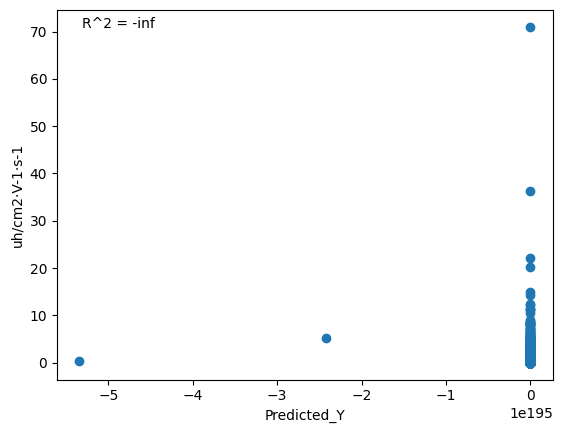

In [53]:
# Plot Predicted_Y vs uh/cm2·V-1·s-1 in merged_df01
plt.scatter(merged_data01['Predicted_Y'], merged_data01['uh/cm2·V-1·s-1'])
plt.xlabel('Predicted_Y')
plt.ylabel('uh/cm2·V-1·s-1')

# Calculate regression between Predicted_Y vs uh/cm2·V-1·s-1
from sklearn.metrics import r2_score
r2 = r2_score(merged_data01['uh/cm2·V-1·s-1'], merged_data01['Predicted_Y'])

# Add the r2 to the plot
plt.text(0.05, 0.95, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=10)

Text(0, 0.5, 'ue/cm2·V-1·s-1')

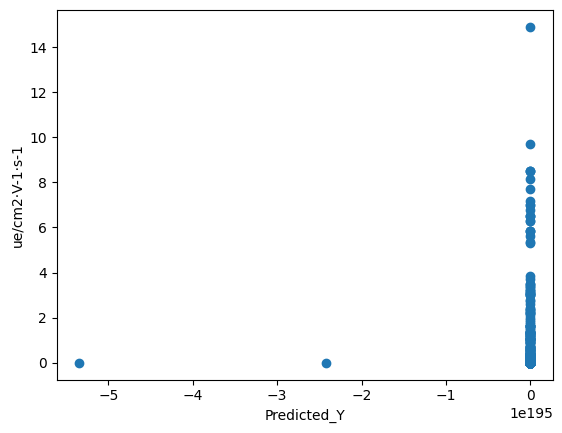

In [54]:
# Plot Predicted_Y vs ue/cm2·V-1·s-1 in merged_df01
plt.scatter(merged_data01['Predicted_Y'], merged_data01['ue/cm2·V-1·s-1'])
plt.xlabel('Predicted_Y')
plt.ylabel('ue/cm2·V-1·s-1')